In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

In [2]:
# Example function to simulate data drift
def generate_data(n=1000, drift=False):
    np.random.seed(42)
    if drift:
        # Simulating drift by shifting the distribution
        return np.random.normal(loc=0.5, scale=1, size=n)
    else:
        return np.random.normal(loc=0, scale=1, size=n)

In [3]:
# Generate two datasets: one with drift and one without
data_before_drift = generate_data(n=1000, drift=False)
data_after_drift = generate_data(n=1000, drift=True)

In [4]:
# Convert to pandas DataFrames
df_before = pd.DataFrame(data_before_drift, columns=['Feature'])
df_after = pd.DataFrame(data_after_drift, columns=['Feature'])

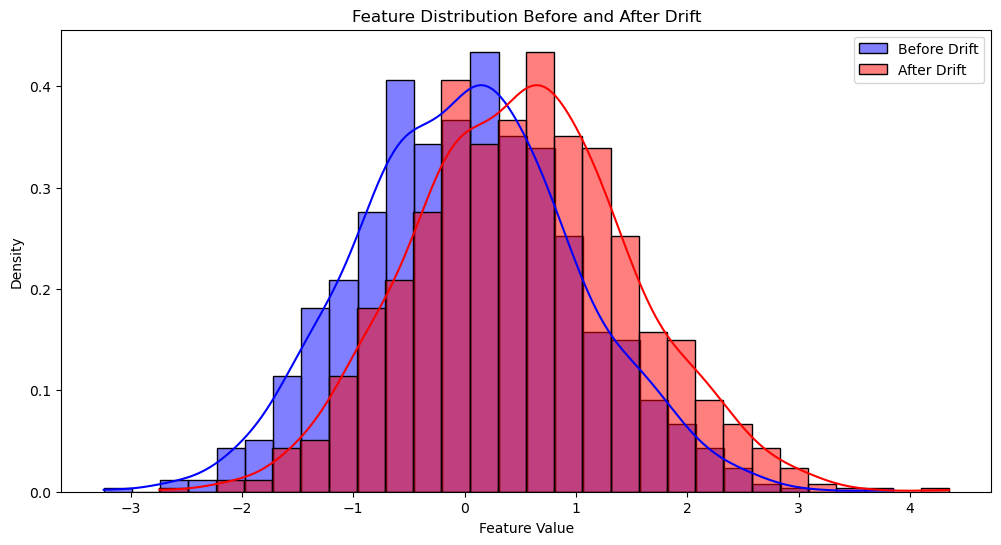

In [9]:
# Plot histograms to visualize drift
plt.figure(figsize=(12, 6))
sns.histplot(df_before['Feature'], color='blue', label='Before Drift', kde=True, stat='density')
sns.histplot(df_after['Feature'], color='red', label='After Drift', kde=True, stat='density')
plt.legend()
plt.title('Feature Distribution Before and After Drift')
plt.xlabel('Feature Value')
plt.ylabel('Density')
plt.show()

In [10]:
# Perform Kolmogorov-Smirnov test for distribution drift
ks_stat, ks_p_value = ks_2samp(df_before['Feature'], df_after['Feature'])

print(f'Kolmogorov-Smirnov test p-value: {ks_p_value}')

Kolmogorov-Smirnov test p-value: 8.402229010639847e-22


In [13]:
# Interpretation of KS test
alpha = 0.05
if ks_p_value < alpha:
    print("Data drift detected (p-value < alpha)")
else:
    print("No significant data drift detected (p-value >= alpha)")

Data drift detected (p-value < alpha)
